#IBM HR ANALYTICS - ATTRITION AND PERFORMANCE

ATTRITION - A process in which the workforce dwindles at a company, following a period in which a number of people retire or resign, and are not replaced.

Importing Required Libraries:-

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Getting the Data:-

In [ ]:
HR_data = pd.read_csv('/content/Employee-Attrition.csv')

**Basic Data Exploration**

Display Data:-

In [ ]:
HR_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


We cannot see all the columns in the dataset due to many columns. So we will display all columns.

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
HR_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Let's see some info:-

In [ ]:
HR_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Now, Let's See Discriptive Statistics :-

In [ ]:
HR_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Now, Checking Duplicate Values:-

In [ ]:
print(HR_data.duplicated().value_counts())

False    1470
Name: count, dtype: int64


In [ ]:
HR_data.drop_duplicates(inplace=True)

In [ ]:
print(HR_data.shape)

(1470, 35)


Checking Missing Values:-

In [ ]:
HR_data.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


Looking At Target Variable:-

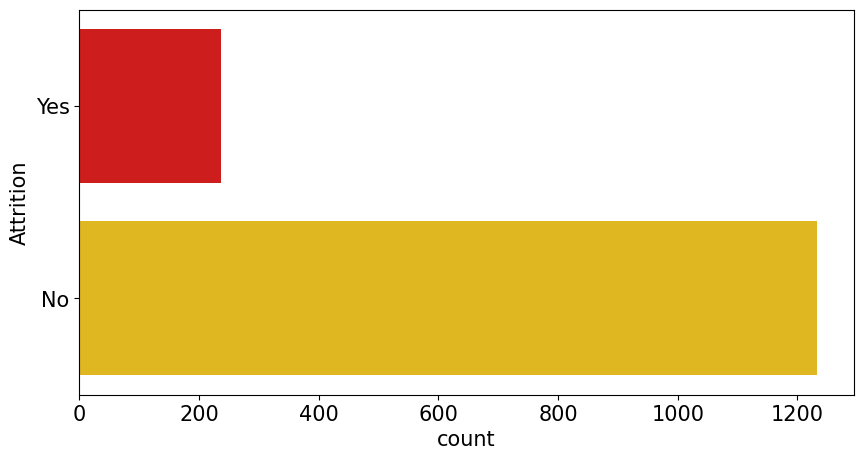

In [ ]:
plt.figure(figsize=(10,5))
plt.rc("font", size = 15)
sns.countplot(y='Attrition', data=HR_data, palette="hot")
plt.show()

Here we notice that the Target column is highly imbalanced, we need to balance the data by using some Statistical Methods.

**Exploratory Data Analysis**

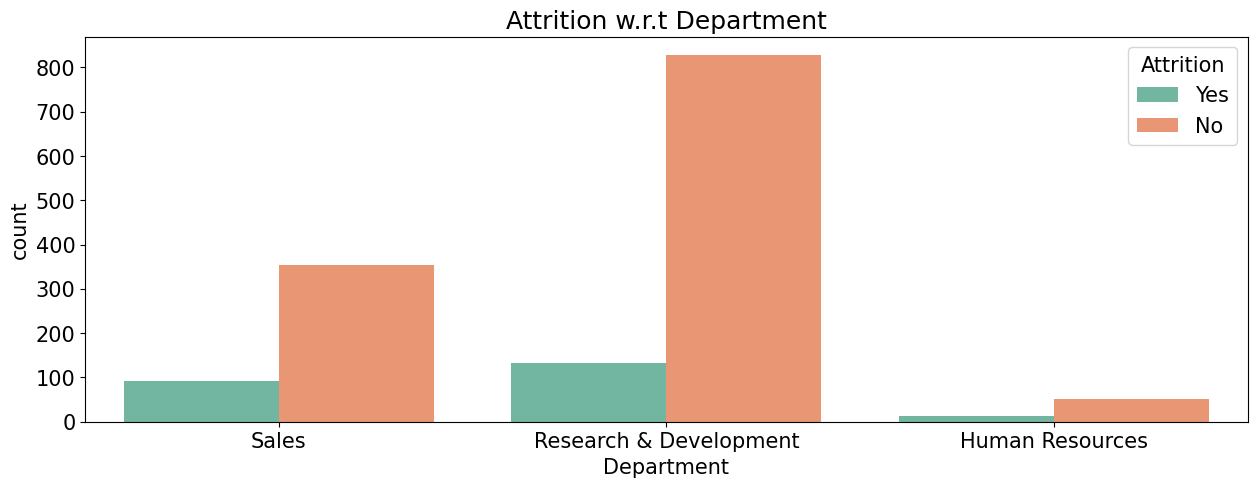

In [ ]:
# Attrition with respect to Department
plt.figure(figsize=(15,5))
plt.rc("font", size = 15)
sns.countplot(x='Department', hue='Attrition', data=HR_data, palette="Set2")
plt.title("Attrition w.r.t Department")
plt.show()

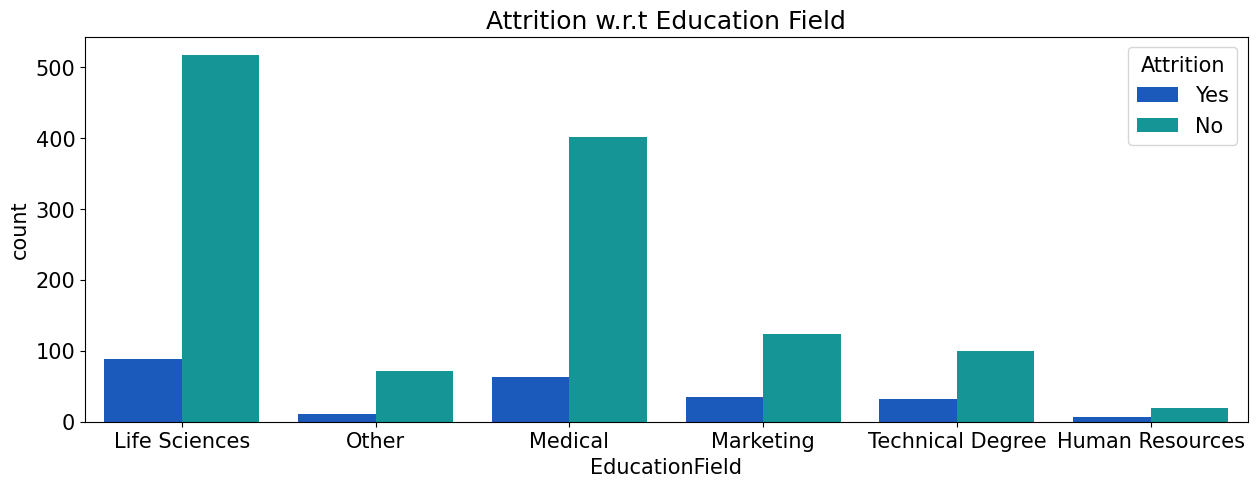

In [ ]:
# Attrition with respect to Education Field
plt.figure(figsize=(15,5))
plt.rc("font", size = 15)
sns.countplot(x='EducationField', hue='Attrition', data=HR_data, palette="winter")
plt.title("Attrition w.r.t Education Field")
plt.show()

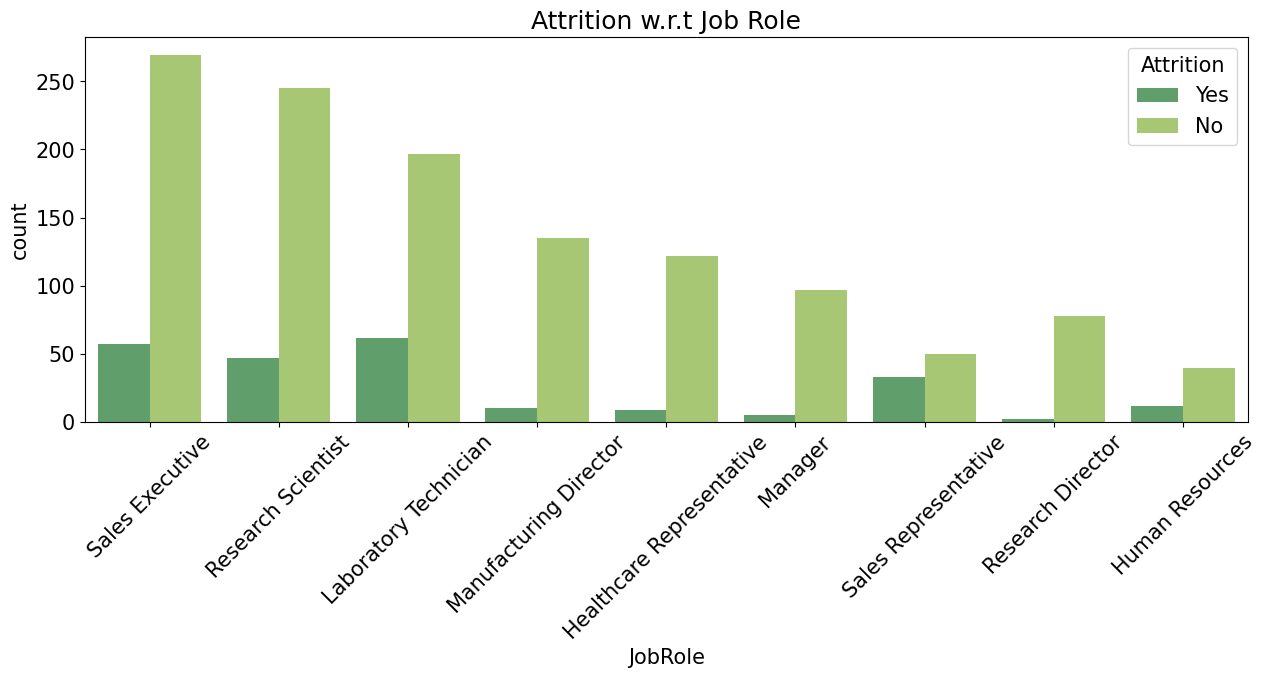

In [ ]:
# Attrition with respect to Job Role
plt.figure(figsize=(15,5))
plt.rc("font", size = 15)
sns.countplot(x='JobRole', hue='Attrition', data=HR_data, palette="summer")
plt.title("Attrition w.r.t Job Role")
plt.xticks(rotation = 45)
plt.show()

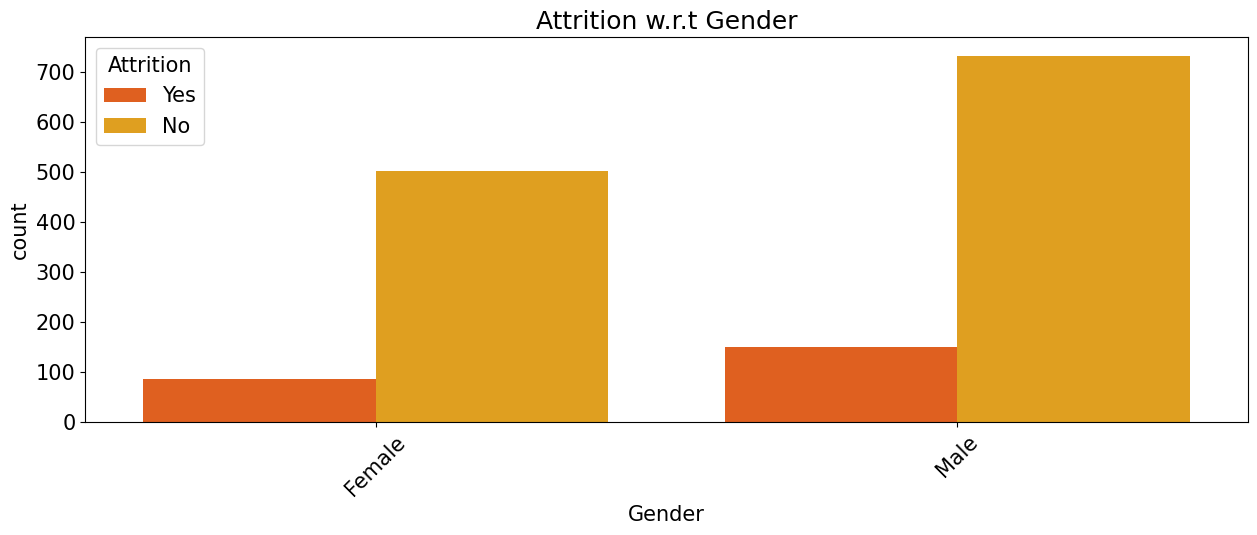

In [ ]:
# Attrition with respect to Gender
plt.figure(figsize=(15,5))
plt.rc("font", size = 15)
sns.countplot(x='Gender', hue='Attrition', data=HR_data, palette="autumn")
plt.title("Attrition w.r.t Gender")
plt.xticks(rotation = 45)
plt.show()

In [ ]:
HR_data.drop(columns = ['count'], inplace = True)

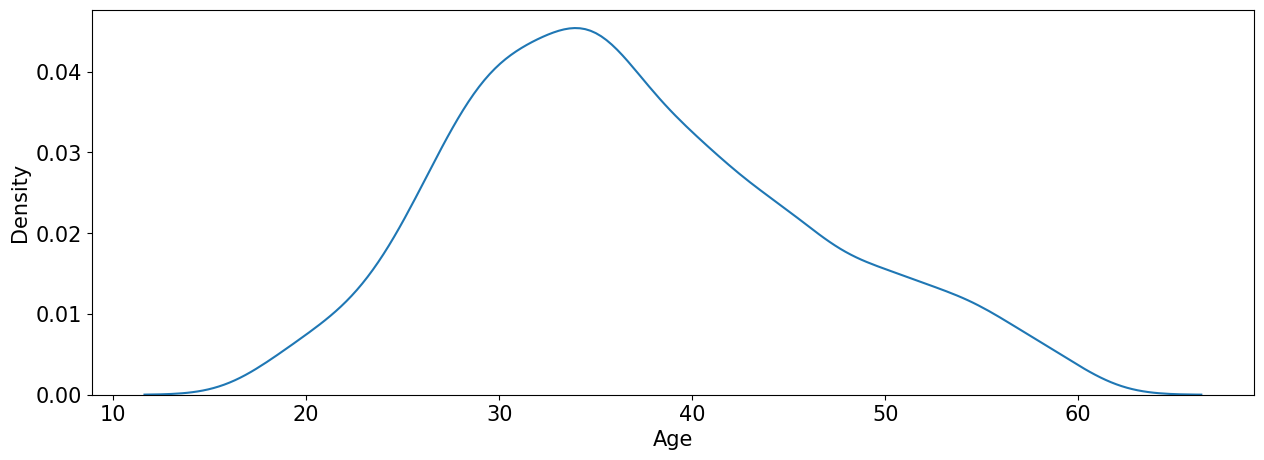

In [ ]:
#distribution of age
plt.figure(figsize = ( 15,5))
sns.distplot(HR_data['Age'], hist = False)
plt.show()

We have some of the numerical columns which are label encoded for us, they are ordinal labels, so let's have a look at them first

In [ ]:
ordinal_features = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']
HR_data[ordinal_features].head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,2,2,3,4,3,1,1
1,1,3,2,2,4,4,3
2,2,4,2,3,3,2,3
3,4,4,3,3,3,3,3
4,1,1,3,2,3,4,3


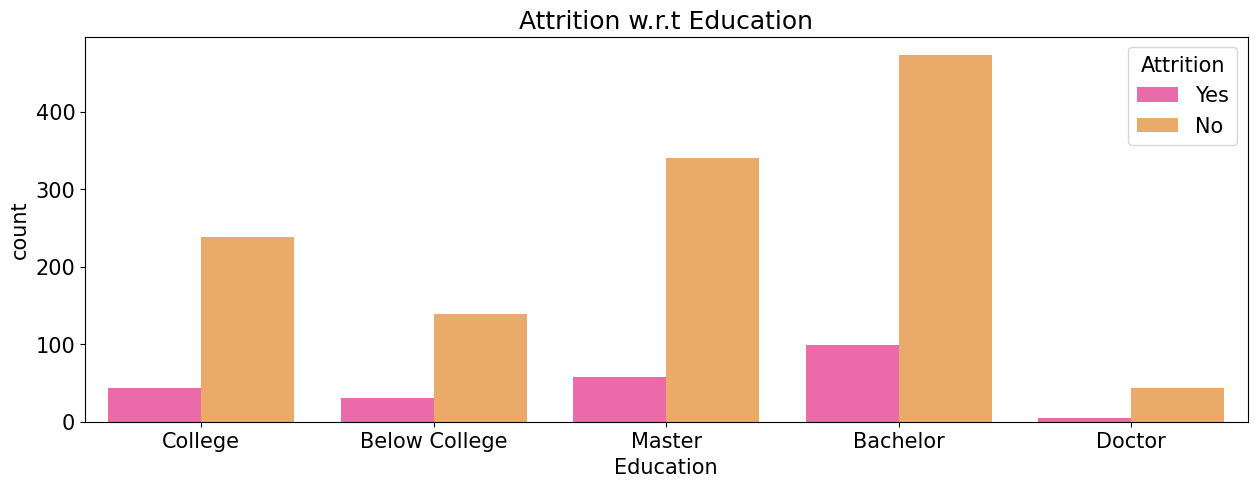

In [ ]:
edu_map = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
plt.figure(figsize=(15,5))
sns.countplot(x=HR_data['Education'].map(edu_map), hue='Attrition', data=HR_data, palette="spring")
plt.title("Attrition w.r.t Education")
plt.show()

Lebel Encoding:-
In machine learning, we usually deal with datasets that contain multiple labels in one or more than one columns. These labels can be in the form of words or numbers. To make the data understandable or in human-readable form, the training data is often labelled in words.

In [ ]:
#Target variable (attrition)
HR_data['Attrition'] = HR_data['Attrition'].replace({'No': 0, 'Yes': 1})

In [ ]:
#encode binary variables
HR_data['OverTime'] = HR_data["OverTime"].map({'No': 0, 'Yes' : 1})
HR_data['Gender'] = HR_data["Gender"].map({'Male': 0, 'Female': 1})

In [ ]:
HR_data['Over18'] = HR_data['Over18'].map({'Y' : 1 , 'No' : 0})

In [ ]:
#encode categorical columns which are ordinal, use labelEncoding
#apply Label encoder to df_categorical
from sklearn.preprocessing import LabelEncoder
encoding_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
label_encoder = {}
for column in encoding_cols:
    label_encoder[column] = LabelEncoder()
    HR_data[column] = label_encoder[column].fit_transform(HR_data[column])


In [ ]:
#look at final data
HR_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,1,94,3,2,7,4,2,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,0,61,2,2,6,2,1,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,0,92,2,1,2,3,2,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,1,56,3,1,6,3,1,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,0,40,3,1,2,2,1,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2


Splitting the data into Training and Testing sample

In [ ]:
x = HR_data.drop(['Attrition'], axis = 1) #Input Features
y = HR_data['Attrition'].values #Output

Resampling:- We are going to use Over Sampling. We will not use Under Sampling to avoid data loss.

In [ ]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
print(Counter(y))
rus = RandomOverSampler(random_state=42)
x_over, y_over = rus.fit_resample(x, y)
print(Counter(y_over))


Counter({np.int64(0): 1233, np.int64(1): 237})
Counter({np.int64(1): 1233, np.int64(0): 1233})


In [ ]:
#Split the data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.2, random_state = 42)


In [ ]:
#Sanity check for the sampled data
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1972, 34)
(494, 34)
(1972,)
(494,)


Logistic Regression:-

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
prediction = logreg.predict(x_test)
cnf_matrix = confusion_matrix(y_test, prediction)
print ('Accuracy Score -', accuracy_score(y_test, prediction))

Accuracy Score - 0.6437246963562753


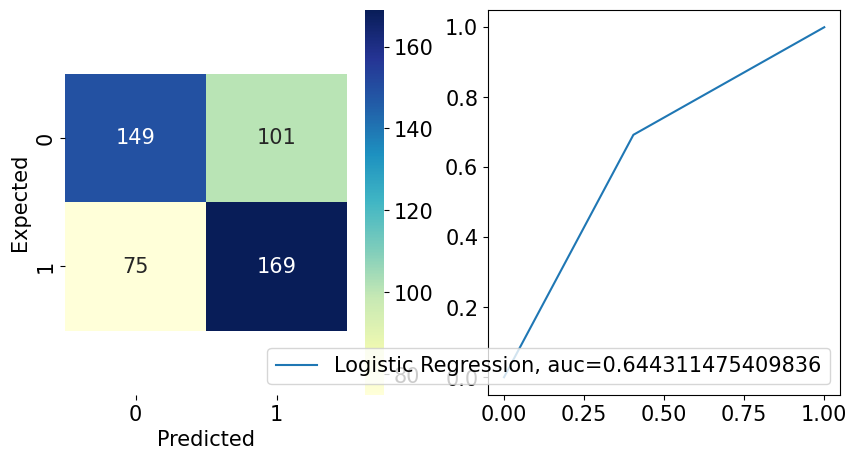

In [ ]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='d')
bottom, top = ax1.get_ylim()
ax2.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Expected')
plt.xlabel('Predicted')

ax2 = fig.add_subplot(1,2,2)
y_pred_prob = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  prediction)
auc = roc_auc_score(y_test, prediction)
ax2 = plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# A very in depth idea of the model performance

Possible options -
Yes, No
Possible Prediction
Yes, No
4 total prediction possibilities
Actual, Prediction
Yes, Yes - Right predictions - True Positive
Yes, No - Wrong predictions - False Negative
No, Yes - Wrong predictions - False Positive
No, No - Right Predictions - True Negative



#Thank You